# Das Abtasttheorem
Version 4.12.2018, S. Mack

Es gibt viele verschiedene Formulierungen des Abtasttheorems -oder wie man es auch nennt- des Nyquist-Shannon-Abtasttheorems. Eine gängige Formulierung ist folgende: 
 
*"Wenn ein Signal Frequenzen bis B Hz enthält, dann muss es mit einer Frequenz von mehr als 2 mal B Hz abgetastet werden, damit keine Information verloren geht."* 
 
In Wikipedia ist folgende Formulierung zu lesen:  
*"Wenn ein Signal keine Frequenzanteile größer B Hz enthält, dann kann es aus einer Folge von äquidistanten Abtastwerten exakt rekonstruiert werden kann, wenn es mit einer Frequenz von größer als 2 mal B abgetastet wurde."*  

(Die Abkürzung *B* steht hier für den Begriff *Bandbreite*.)

Letztlich steckt in dieser Aussage das Erfolgsgeheimnis der Digitalisierung: Wenn man die Bandbreite eines Signals kennt, dann kann auf einen Großteil der Signaldaten verzichtet werden. Im Rundfunk nennt man so etwas *digitale Dividende* - auf einem ehemals analogen Fernsehkanal werden heute eine Vielzahl digitale Sender übertragen.

**Kann man das Abtasttheorem auch beweisen?** 
Hierbei stellen sich zwei getrennte Fragen: 
1. Steckt wirklich die komplette Information des Signals in den Abtastwerten. Bzw. wieso geht Information verloren, wenn mit der Frequenz 2 mal BW Hz oder langsamer abgetastet wird?
2. Wie kann man aus den Abtastwerten das Signal wieder so rekonstruieren, ohne dass beispielsweise bei einem Sinussignal auf einmal Kanten im rekonstruierten Signalverlauf auftauchen?

Im folgenden Abschnitt wird gezeigt, wieso eine sogenannte Unterabtastung mit 2 mal B Hz oder weniger zu einem Informationsverlust führt.  
Im darauf folgenden Abschnitt wird darauf eingegangen, wie man ein mit wenig mehr als 2 mal B Hz abgetastetes Signal wieder originalgetreu rekonstruiert.  


In [2]:
import numpy as np
import matplotlib.pyplot as plt
# %-Anweisung (speziell für Jupyter Notebooks) damit Plots hier im Text dargestellt werden
%matplotlib inline

## Informationsverlust bei Unterabtastung
Nachfolgend wird gezeigt, mit welcher Abtastfrequenz ``f_samp`` ein Sinussignal  mit einer Frequenz ``f_sig`` (das ist hier identisch mit der Bandbreite B) digitalisiert werden muss, damit keine Signalinformation verloren geht.  
``sig_ana`` ist das analoge Sinussignal. Da wir es hier mit einem digitalen Rechner zu tun haben, ist ``sig_ana`` streng genommen auch ein digitales Signal. Jedoch ist es über die Zeitpunkten ``t_data`` so fein zeitlich quantisiert, wodurch die Zeitdiskretisierung nicht ins Gewicht fällt.
``sig_dig`` ist das abgetastete digitale Signal, welches nur an den Abtastzeitpunkten ``t_dig`` definiert ist, die sehr viel weiter auseinanderliegen als ``t_data``.  
*Eine Wertdiskretisierung ist hier kein Thema. Es geht allein um einen möglichen Informationsverlust durch das Abtasten d.h. durch die **Zeit**diskretisierung.*  

"Abtasten" ist mathematisch gesehen ein Multiplizieren und Aufaddieren des analogen Signals mit Deltafunktionen:
$$ sig_{dig}(t_i) = \sum_{ n = -\infty}^{+\infty} sig_{ana}(t) \cdot \delta (t - n \cdot T_a) $$  
``T_samp`` ist hierbei das Abtastintervall also gleich 1/``f_samp``.

Im Zeitbereich wird das analoge Signal also mit Deltafunktionen multipliziert. Das bedeutet im Frequenzbereich: Das Spektrum ``spec_ana`` des Analogsignals wird mit entsprechenden Deltafunktion gefaltet. Das Spektrum ``spek_dig`` des abgetasteten Signals berechnet sich damit aus einer Aneinanderreihung der Analogsignalspektren mit einem Frequenzabstand gleich der Abtastfrequenz:

$$ spec_{dig}(f_i) = spec_{ana}(f) * [f_{samp} \cdot \sum_{ n = -\infty}^{+\infty} \delta (f - {n \over T_a})] 
= f_{samp} \cdot \sum_{ n = -\infty}^{+\infty} spec_{ana}(f - {n \cdot f_{samp}})$$  

Im Endeffekt geht durch eine Abtastung nur dann keine Information verloren, wenn innnerhalb des Spektrums ``spec_dig`` die Analogspektren nicht überlappen, d.h. wenn ``f_samp`` gößer als die doppelte Bandbreite B bzw. im Fall des hier betrachteten analogen Sinussignals muss die Abtastrate also größer als die doppelte Sinusfrequenz ``f_sig`` sein.  

Im Folgenden wird dies grafisch nachgewiesen, in dem das Amplitudenspektrum des analogen und abgetasteten Signals mit einer FFT (Fast Fourier Tranformation) berechnet und dargestellt wird. 

### Erzeugung und Darstellung des analogen und abgetasteten Signals
Im nachfolgenden Quellcode wird ein Sinussignal mit einer Frequenz ``f_sig`` zu den Zeitpunkten ``t_data``  erzeugt. Diese Zeiten liegen so dicht, dass dieses Signal ein quasi analoges zeitkontinuierliches Signal ``sig_ana`` repräsentiert.  
Das gleiche Sinaussignal wird einer Abtastfrequenz ``f_samp`` d.h. zu den Zeitpunkten ``t_dig`` abgetastet und grafisch dargestellt. Diese Abtastzeitpunkte liegen um den Faktor ``si_fac`` weiter auseinander als die des "analogen" Signals.  


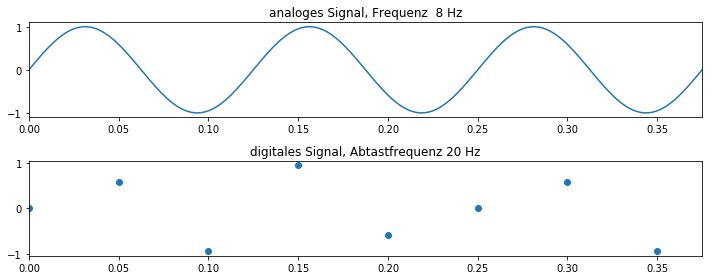

In [3]:
T = 8 # Dauer des Zeitsignals, Anzahl Abtastwerte = T * f_samp

# Faktor mit dem durch Interpolation Anzahl der Werte erhöht wird
# Nach jedem digitalen Wert (außer dem letzten) kommen (si_fac - 1) neue Werte
# dazu. Insgesamt erhöht sich die Anzahl der Werte um (Ndig - 1) * si_fac
si_fac = 32

f_sig = 8  # Signalfrequenz in Hz
f_samp = 20 # Abtastfrequenz in Hz

# Dichte der Datenpunkte der Zeitfunktion, mit der beim analogen wie auch beim 
# digitalen interpolierten Signal die FFT durchgeführt wird
f_data = f_samp * si_fac

# Festlegung der Abtastpunkte von -1 bis 1+1/fs mit Abstand 1/fs
t_dig = np.arange(0,T+1/f_samp,1/f_samp) 
t_data = np.arange(0,T,1/f_data)
sig_dig = np.sin(2*np.pi*f_sig*t_dig) # Abgetastetes Signal nicht interpoliert
sig_ana = np.sin(2*np.pi*f_sig*t_data) # Quasi analoges Signal

# Darstellung analoges und digitales abgetastetes Signal
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols= 1)
ax1.plot(t_data,sig_ana,'-')
ax1.set_xlim(xmin = 0,xmax = 3/f_sig) # Drei Perioden darstellen
ax1.set_title('analoges Signal, Frequenz %2.0f Hz' % f_sig)
ax2.plot(t_dig,sig_dig,'o')
ax2.set_xlim(xmin = 0,xmax = 3/f_sig)
ax2.set_title('digitales Signal, Abtastfrequenz %2.0f Hz' % f_samp)
fig.set_size_inches((10,4))
plt.tight_layout() # Damit Achsenbeschriftungen nicht überschneiden

### Erzeugung eines stufeninterpolierten Signals aus dem abgetasteten Signal
Ziel dieses Abschnitts ist es, die mit einer FFT berechneten Amplitudenspektren des analogen und das abgetasteten Signals zu vergleichen.  
Aus dem abgetasteten Signal kann jedoch nicht sofort ein Spektrum für Frequenzen höher ``f_samp`` berechnet werden, weil dessen Datenpunkte im zeitlichen Abstand von ``1/f_samp`` auseinander liegen.  
Damit eine FFT auch höhere Frequenzanteile berechnet, müssen für das abgetastete Signal innerhalb jedes Abtastintervalls zusätzliche Daten erzeugt werden. Damit hierduch keine neuen (und womöglich falschen) Informationen in das Signal gelangen, wird der abgetastete Wert einfach ``si_fac -1`` mal wiederholt. Dadurch erhöht sich die (scheinbare) Abtastrate genau den Faktor ``si_fac``.  
Dieses neue Signal erhält die Bezeichnung ``sig_si``, "si" steht für Stufeninterpolation.

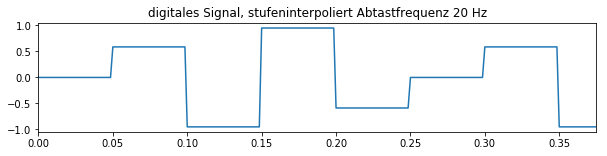

In [6]:
# si_fac mal dichtere Zeitwerte t_si: neue Werte erzeugen mit Stufeninterpolation
interval=[] # Liste von Numpy arrays mit boolschen Werten für ein Samplingintervall
apprx = [] # Liste von Numpy arrays mit interpol. Werten für ein Samplingintervall
t_si = np.hstack([np.linspace(t_dig[i],t_dig[i+1],si_fac,endpoint=False) for i in range(len(t_dig)-1) ])
for i in range(len(t_dig)-1):
    # Vergleich für jedes Element von t_si ob im entsprechenden Samplingintervall
    interval.append(np.logical_and(t_dig[i] <= t_si,t_si < t_dig[i+1]))
    # Neue Werte des Abtastintervalls erhalten vorherigen Abtastwert = Sample & Hold
    apprx.append(sig_dig[i])  
# Aneinanderreihung neuer Werte für Stufeninterpolation
sig_si = np.piecewise(t_si,interval,apprx)

fig, (ax3) = plt.subplots(nrows=1, ncols= 1)
ax3.plot(t_data,sig_si,'-')
ax3.set_xlim(xmin = 0,xmax = 3/f_sig)
ax3.set_title('digitales Signal, stufeninterpoliert Abtastfrequenz %2.0f Hz' % f_samp)
fig.set_size_inches((10,2))

### FFT des analogen und stufeninterpolierten Signals
Sowohl das analoge als auch das stufeninterpolierte Signal liegen jetzt in gleicher Form, d.h. zu den selben Zeitpunkten vor.  
Aus beiden Signalen wird nun das Amplitudenspektrum über einen FFT-Algorithus der Numpy-Bibliothek berechnet und dargestellt.   
Für die FFT wird mit der Konstante ``Nf`` festgelegt, wie fein die Frequenzauflösung des Amplitudenspektrums sein soll. Diese Konstante sollte mindestens so groß sein wie die Anzahl der Datenpunkte der beiden Signale ``sig_si`` bzw ``sig_ana``.


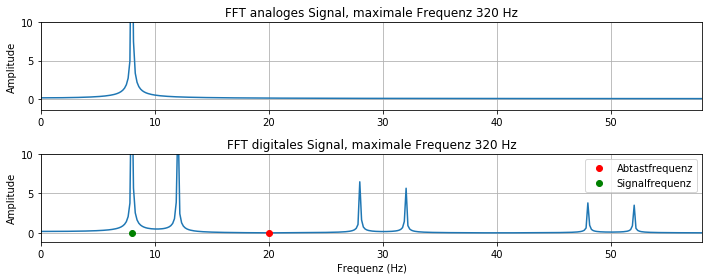

In [7]:
Nf = 4096 # Anzahl Frequenzwerte der FFT: Mindestens = Anzahl Abtastewerte
fig, (ax4, ax5) = plt.subplots(nrows=2, ncols= 1)
# =============================================================================
# FFT der analogen Funktion
# =============================================================================
spec_ana = np.fft.fft(sig_ana,Nf)/np.sqrt(Nf)
ax4.plot(np.linspace(0,f_data,Nf),abs(spec_ana),'-') # Amplitudenspektrum
ax4.set_title('FFT analoges Signal, maximale Frequenz %2.0f Hz' % (f_data/2))
ax4.set_ylabel('Amplitude')
ax4.set_xlim(xmin = 0,xmax = min(0.5*f_data,f_sig + 2.5*f_samp))
ax4.set_ylim(ymax=10)
ax4.grid()
# =============================================================================
# FFT der stufen-interpolierten Funktion
# =============================================================================
spec_si = np.fft.fft(sig_si,Nf)/np.sqrt(Nf)
ax5.plot(np.linspace(0,f_data,Nf),abs(spec_si),'-') # Amplitudenspektrum
ax5.plot(f_samp,0,'o',color = 'r',label='Abtastfrequenz')
ax5.plot(f_sig,0,'o',color = 'g',label='Signalfrequenz')
ax5.set_title('FFT digitales Signal, maximale Frequenz %2.0f Hz' % (f_data/2))
ax5.set_ylabel('Amplitude')
ax5.set_xlabel('Frequenz (Hz)')
ax5.set_xlim(xmin = 0,xmax = min(0.5*f_data,f_sig + 2.5*f_samp))
ax5.set_ylim(ymax=10)
ax5.grid()
ax5.legend(facecolor='w')
fig.set_size_inches((10,4))
plt.tight_layout() # Damit Achsenbeschriftungen nicht überschneiden

In den beiden Plots oben ist gut zu erkennen, dass das Abtasten tatsächlich neue Frequenzanteile im Signalspektrum erzeugt:  
Bei jedem Vielfachen der Abtastfrequenz (siehe roter Punkt) erscheint mit links und rechts mit Abstand = Signalfrequenz ein neuer Peak.  

**Beispiel:** Bei einer Signalfrequenz von 8 Hz und einer Abtastfrequenz von 20 Hz erscheinen neue Frequenzpeaks bei 20 - 8 Hz = 12 Hz bzw. 20 + 8 Hz = 28 Hz, bei 40 - 8 Hz = 22 Hz bzw. 40 + 8 Hz = 48 Hz, usw.  
*Was passiert wenn die Abtastfrequenz nun auf 16 Hz reduziert wird?*  
In diesem Fall würde der erste neue Frequenzpeak mit der Signalfrequenz überlappen. Dadurch ginge Information verloren, denn für eine Rekonstruktion können diese beiden Frequenzanteile nicht mehr getrennt werden.  

** Ein Überlapp der Signalfrequenz mit diese durch das Abtasten erzeugten "Störfrequenzen" kann nur dann verhindert werden, wenn die Abtastfrequenz mehr als doppelt so groß ist wie die Signalfrequenz.**  

... da ist es wieder: **Das Abtasttheorem**.

## Rekonstruktion eines abgetasteten Signals
### Erzeugung und Darstellung des analogen und abgetasteten Signals
Im nachfolgenden Quellcode wird ein Sinussignal mit einer Frequenz ``f_sig`` von 1 Hz - also B = 1 Hz - mit einer Abtastfrequenz ``f_samp`` von 3 Hz abgetastet und grafisch dargestellt.

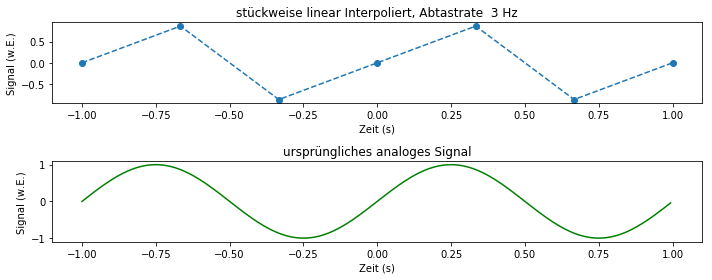

In [8]:
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1)

f_sig = 1.0  # Signalfrequenz in Hz
# Samplingfrequenz: Diese ändern, um zu sehen wie sich das auf das Abtastergebnis auswirkt
f_samp = 3.0 # Ausgangswert: Drei mal so groß wie Signalfrequenz
t_dig = np.arange(-1,1+1/f_samp,1/f_samp) # Festlegung der Abtastpunkte von -1 bis 1+1/fs mit Abstand 1/fs
t_ana = np.arange(-1,1,1/(50*f_samp)) # "Analogsignal" sozusagen über sehr hohe Abtastrate simuliert ;-)
sig_dig = np.sin(2*np.pi*f_sig*t_dig) # Abgetastetes Signal
sig_ana = np.sin(2*np.pi*f_sig*t_ana)
ax1.plot(t_dig,sig_dig,'o--')
ax1.set_xlabel('Zeit (s)')
ax1.set_ylabel('Signal (w.E.)')
ax1.set_title('stückweise linear Interpoliert, Abtastrate %2.0f Hz' % f_samp)
ax1.set_xlim(-1.1,1.1)

ax2.plot(t_ana,sig_ana,'-',color='g')
ax2.set_xlabel('Zeit (s)')
ax2.set_ylabel('Signal (w.E.)')
ax2.set_title('ursprüngliches analoges Signal')
ax2.set_xlim(-1.1,1.1)
fig.set_size_inches((10,4))
plt.tight_layout()

Im Plot oben ist unten in Grün das analoge Sinussignal und oben eine stückweise lineare Interpolation des davon abgetasteten Signals dargestellt.  
Selbst eine Abtastung mit 10 Hz (*dafür Variable ``f_samp`` im Quellcode oben einfach auf 10.0 ändern*) bewirkt noch ein rekonstruiertes Signal mit Ecken und Kanten, wenn die Datenpunkte einfach mit Linien verbunden werden.  
Auch wenn mit einer noch höheren Frequenz wie z.B. ``f_samp = 100`` Hz abgetastet wird, erscheinen immer noch Ecken und Kanten, wie Ausschnittsvergrößerung unten zeigt (**Achtung:** Wenn die Abtastfrequenz zu klein eingestellt ist wird hier u.U. gar kein Datenpunkt angezeigt!).  

Text(0.5,1,'Zoom abgetastetes Signal, Abtastrate  3 Hz')

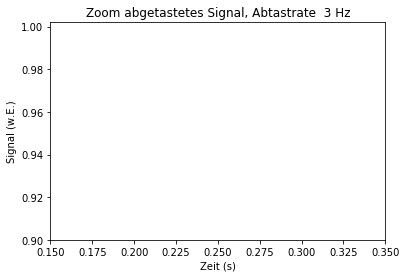

In [9]:
fig,ax = plt.subplots()

ax.plot(t_dig,sig_dig,'o--')
ax.axis( xmin = 0.15, xmax = 0.35, ymin = 0.90, ymax = 1.002 ) # Nur Achsenausschnitte anzeigen
ax.set_xlabel('Zeit (s)')
ax.set_ylabel('Signal (w.E.)')
ax.set_title('Zoom abgetastetes Signal, Abtastrate %2.0f Hz' % f_samp)

### Erzeugung eines stückweise linearinterpolierten Signals aus den Abtastwerten
**Das Abtasttheorem sagt jedoch aus, dass selbst bei nur dreifacher Abtastfequenz das Signal wieder "originalgetreu" rekonstruiert werden kann. Wie geht das?**  

Als Nächstes wird untersucht, wie groß die Abweichung dieser mit Linien interpolierten Abtastwerten vom ursprünglichen analogen Signalverlauf abweicht.  
Dafür wird mit der Funktion ``numpy.piecewise`` eine stückweise linear interpolierte Funktionswerte ``sig_li`` für die Zeiten ``t_li`` aus den Abtastwerten erzeugt:

In [10]:
# 20x dichtere Zeitwerte t_li und dafür Werte sig_li für stückweise lin. Interpol erzeugen
# Quellcode entnommen aus Buch J. Unpingco: Python for Signal Processing.
interval=[] # Liste von Numpy arrays mit boolschen Werten für ein Samplingintervall
apprx = [] # Liste von Numpy arrays mit interpol. Werten für ein Samplingintervall

# Mehr Zeitwerte erzeugen: 'endpoint = False': Intervall bei linspace wird durch 20 statt 19 geteilt
# 'hstack': Zahlenreihen zu horizontalem Array zusammensetzen
t_li = np.hstack([np.linspace(t_dig[i],t_dig[i+1],20,endpoint=False) for i in range(len(t_dig)-1) ])
for i in range(len(t_dig)-1):
    # Vergleich für jedes Element von t_li ob im entsprechenden Samplingintervall
    interval.append(np.logical_and(t_dig[i] <= t_li,t_li < t_dig[i+1]))
    apprx.append( (sig_dig[i+1]-sig_dig[i])/(t_dig[i+1]-t_dig[i])*(t_li[interval[-1]]-t_dig[i]) + sig_dig[i])
sig_li = np.piecewise(t_li,interval,apprx) # numpy Array mit Werten aus einzelnen Samplingintervallen von apprx

### Signalrekonstruktion mit stückweise linearinterpoliertem Signal
Nun wird ein Plot erzeugt, der den Betrag der absoluten Abweichung ``e_dig`` der (abgetasteten) stückweise linear interpolierten Funktion  ``sig_li`` zum ursprünglichen (analogen) Sinussignal darstellt.

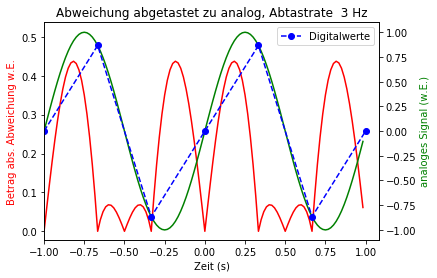

In [11]:
fig,ax1 = plt.subplots()
e_dig = np.abs(sig_li - np.sin(2*np.pi*f_sig*t_li)) # Betrag absolute Abweichung
ax1.plot(t_li, e_dig,'r')
ax1.axis(xmin=-1,ymax= (e_dig.max()+0.1) )
ax1.set_xlabel('Zeit (s)')
ax1.set_ylabel('Betrag abs. Abweichung w.E.', color='r')
ax1.set_title('Abweichung abgetastet zu analog, Abtastrate %2.0f Hz' % f_samp)

ax2 = ax1.twinx()
ax2.plot(t_li,np.sin(2*np.pi*f_sig*t_li),'-',color = 'g')
ax2.plot(t_dig,sig_dig,'o--',color = 'b',label='Digitalwerte')
ax2.set_ylabel('analoges Signal (w.E.)', color = 'g')
ax2.legend(facecolor='w')

Der Betrag der Differenz zwischen dem analogen Signal (grün) und den stückweise linear interpoliertem digitalien Signal (hier sind nur die Abtastwerte mit blauen Punkten dargestellt) ist in dem Plot oben rot dargestellt. Sie wird mit zunehmender Abtastfrequenz zwar kleiner, ist aber selbst bei einer Abtastrate mit 10-facher Signalfrequenz noch etwa 5 % groß!  
Und dabei sollte doch schon eine Abtastrate mit etwas mehr als zweifacher Signalfrequenz ausreichen, um das analoge Signal fehlerfrei rekonstruieren zu können. *Wie kann das sein?*    
Die hohen Abweichungen kommen hier durch die stückweise lineare Interpolation zustande (siehe gestrichelte blaue Linie).  
*Wesentlich genauer lässt sich das Signal aber mit der sogenannten **sinc-Interpolation** rekonstruieren, wie gleich gezeigt wird.*

### Die sinc-Interpolation zur besseren Signalrekonstruktion

Das analoge Signal  $sig(t)$ ist bandbreitenbegrenzt. Sein höchster Frequenzanteil liegt bei der Frequenz $B$. Das bedeutet für seine Fouriertransformierte $SIG(f)$:

$ SIG(f) = 0 $ für $ |f|>B $

Also berechnet sich $sig(t)$ über die inverse Fouriertransformation aus $SIG(f)$ zu:
    
$$ sig(t) = \int_{-B}^{B} SIG(f) \cdot e^{j 2 \pi f t} df $$

Die Frequenz f wird hierbei von -B bis +B aufintegriert - es gibt also auch negative Frequenzen, wobei $SIG(-f)$ prinzipiell nicht von $SIG(+f)$ abhängt. Da $SIG(f)$ außerhalb der Bandbreite $B$ gleich Null ist, kann man so tun, als wäre dies eine periodische Funktion mit der Periode $2 \cdot B$.  
Also kann man $SIG(f)$ auch als Fourier-Reihe darstellen:
    
$$ SIG(f) = \sum_{k \in \mathbb{Z}} a_k \cdot e^{- j 2 \pi k f \over {2 B}} $$

Die Fourierkoeffizienten $a_k$ berechnen sich zu 

$$ a_k = \frac{1}{2 B} \int_{-B}^{B} SIG(f) \cdot e^{j 2 \pi k f \over {2 B}} df $$

Diese Koeffizienten sind sehr ähnlich zu den Integral für $sig(t)$ oben. Es folgt:

$$ a_k = \frac{1}{2 B} \cdot sig(t = \frac{k}{2 B}) $$

Diese Werte der $a_k$ werden nun in die obige Fourier-Reihe für $SIG(f)$ eingesetzt:

$$ SIG(f) = \sum_{k \in \mathbb{Z}} [\frac{1}{2 B} sig(t = \frac{k}{2 B})] \cdot e^{- j 2 \pi k f \over {2 B}} $$

Wie in der zweiten Formel dieses Abschnitts dargestellt, kann nun $ sig(t) $ als inverse Fouriertransformierte von $ SIG(f) $ berechnet werden:

$$ sig(t) = \int_{-B}^{B} \{ \sum_{k \in \mathbb{Z}} [\frac{1}{2 B} sig(t = \frac{k}{2 B})] \cdot e^{- j 2 \pi k f \over {2 B}} \} \cdot e^{j 2 \pi f t} df $$

Hier darf man nun die Reihenfolge des Integrals und der Summe tauschen. Da $ sig(t) $ nicht von $ f $ abhängt, darf das Integral sogar noch einen Term weiter nach rechts geschoben werden. Damit ergibt sich:

$$ sig(t) = \sum_{k \in \mathbb{Z}} sig(t = \frac{k}{2 B}) \cdot \frac{1}{2 B} \cdot \int_{-B}^{B} e^{ - j 2 \pi k f \over {2 B} +j 2 \pi f t} df  $$

Die letzen beiden Terme ergeben die "sinc-Funktion" $sinc(x) =  sin({\pi x}) / {\pi x}$:

$$ \frac{1}{2 B} \cdot \int_{-B}^{B} e^{ - j 2 \pi k f \over {2 B} +j 2 \pi f t} df = \frac{sin(\pi (k-2 t B)} {\pi (k- 2 t B)} = sinc(k-2 t B)$$

Somit ergigt sich schlussendlich für $ sig(t) $:

$$ sig(t) = \sum_{k \in \mathbb{Z}} sig(t = \frac{k}{2 B}) \cdot sinc(k-2 t B) $$

Dies ist genau die Formel, welche aus den Abtastwerten $ sig(t_{dig}) $ das ursprünglich analoge Signal $sig(t_{ana})$ wieder herstellt.  

Das analoge Signal $sig(t_{ana})$ wurde mit der Frequenz $f_{samp}$ abgetastet, welche mehr als doppelt so groß ist wie die Bandbreite von $sig(t_{ana})$. Die Abtastperiode beträgt also $1/f_{samp}$. Die in der vorangegangenen Rechnung verwendete Bandbreite $B$ kann ohne Probleme größer gewählt werden, als die Bandbreite des analogen Signals. Die Formel für die Sinc-Interpolation bleibt trotzdem gültig.  
In diesem Sinn ist es vorteilhaft $ B = f_s /2$ anzunehmen, denn dann sind die Zeiten $t=k/{2 B}$ genau die Abtastzeiten.  
Der Index $k$ ist eine ganze Zahl und läuft von $-\infty$ bis $+\infty$. Natürlich sind keine unendlich vielen Abtastwerte vorhanden sondern nur welche zwischen den Zeiten -1 s und +1 s. $k$ läuft also lediglich von $-f_{samp}/f_{sig}$ bis $+f_{samp}/f_{sig}$.  

Somit wird für den Quellcode unten folgende Näherung gemacht:

$$ sig(t) \approx \sum\limits_{-f_{samp}/f_{sig}}^{+f_{samp}/f_{sig}} sig(t = \frac{k}{2 B}) \cdot sinc(k-2 t B) $$

Da also nicht Abtastwerte vor und nach dem zu rekonstruierenden Singalbereich vorliegen, kann in diesem konkreten Fall die Rekonstruktion nur näherungsweise als sinc-Interpolation berechnet werden. Bei einem Oszilloskop ist das beispielsweise anders, denn liegen normalerweise auch viele Abtastwerte vor und nach dem angezeigtem Signalbereich vor.

Text(0.5,1,'Orig. und rekonstruiertes Signal, Abtastrate  3 Hz')

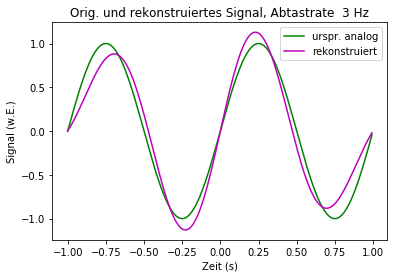

In [12]:
fig,ax = plt.subplots()
zahl_koeff=(len(t_dig) - 1)//2 # // steht für Ganzzahldivision
sig_rek=0 # rekonstruiertes Signal
for k in range(-zahl_koeff,zahl_koeff): 
   # Fourierreihe: Berechnung sig(t) für Zeiten von t_ana
   sig_rek+=sig_dig[k+zahl_koeff]*np.sinc( k - f_samp * t_ana)
ax.plot(t_ana,sig_ana,'-', color='g',label='urspr. analog')
ax.plot(t_ana,sig_rek,'-', color='m',label='rekonstruiert')
ax.set_xlabel('Zeit (s)')
ax.set_ylabel('Signal (w.E.)')
ax.legend(facecolor='w')
ax.set_title('Orig. und rekonstruiertes Signal, Abtastrate %2.0f Hz' % f_samp)

Wie im Plot oben zu sehen, ist der mit dieser Näherung rekonstruierte Signalverlauf zwar nicht deckungsgleich mit dem ursprünglichen analogen Signal. Er weicht jedoch wesentlich weniger von ihm ab, als die stückweise lineare Interpolation.  

Im Plot unten ist wieder die absolute Abweichung dieses Mal des mit der sinc-Interpolation rekonstruierten Signals vom ursprünglichen analogen Signal dargestellt.

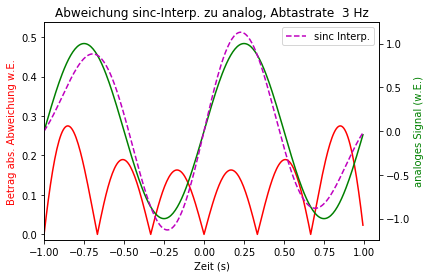

In [13]:
fig,ax1 = plt.subplots()
e_sinc = np.abs(sig_rek - np.sin(2*np.pi*f_sig*t_ana)) # absolute Abweichung
ax1.plot(t_ana, e_sinc,'r')
ax1.axis(xmin=-1,ymax= (e_dig.max()+0.1))
ax1.set_xlabel('Zeit (s)')
ax1.set_ylabel('Betrag abs. Abweichung w.E.', color='r')
ax1.set_title('Abweichung sinc-Interp. zu analog, Abtastrate %2.0f Hz' % f_samp)

ax2 = ax1.twinx()
ax2.plot(t_ana,np.sin(2*np.pi*f_sig*t_ana),'-',color = 'g')
ax2.plot(t_ana,sig_rek,'--',color = 'm',label='sinc Interp.')
ax2.set_ylabel('analoges Signal (w.E.)', color = 'g')
ax2.legend(facecolor='w')